In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import datetime as DT
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
player = pd.read_csv('players.csv')
salary = pd.read_csv('salaries.csv')

In [3]:
print(player.head(), '\n', salary.head())

         _id         birthDate              birthPlace  career_AST career_FG%  \
0  abdelal01     June 24, 1968            Cairo, Egypt         0.3       50.2   
1  abdulza01     April 7, 1946      Brooklyn, New York         1.2       42.8   
2  abdulka01    April 16, 1947      New York, New York         3.6       55.9   
3  abdulma02     March 9, 1969   Gulfport, Mississippi         3.5       44.2   
4  abdulta01  November 3, 1974  Maisons Alfort, France         1.1       41.7   

  career_FG3% career_FT%  career_G career_PER  career_PTS  ...    draft_pick  \
0         0.0       70.1       256       13.0         5.7  ...  25th overall   
1         NaN       72.8       505       15.1         9.0  ...   5th overall   
2         5.6       72.1      1560       24.6        24.6  ...   1st overall   
3        35.4       90.5       586       15.4        14.6  ...   3rd overall   
4        23.7       70.3       236       11.4         7.8  ...  11th overall   

  draft_round              draft

In [4]:
nba = player.merge(salary, left_on='_id', right_on='player_id')
print(nba.head())
nba.to_csv('nba.csv', index=False)

         _id      birthDate    birthPlace  career_AST career_FG% career_FG3%  \
0  abdelal01  June 24, 1968  Cairo, Egypt         0.3       50.2         0.0   
1  abdelal01  June 24, 1968  Cairo, Egypt         0.3       50.2         0.0   
2  abdelal01  June 24, 1968  Cairo, Egypt         0.3       50.2         0.0   
3  abdelal01  June 24, 1968  Cairo, Egypt         0.3       50.2         0.0   
4  abdelal01  June 24, 1968  Cairo, Egypt         0.3       50.2         0.0   

  career_FT%  career_G career_PER  career_PTS  ...       position shoots  \
0       70.1       256       13.0         5.7  ...  Power Forward  Right   
1       70.1       256       13.0         5.7  ...  Power Forward  Right   
2       70.1       256       13.0         5.7  ...  Power Forward  Right   
3       70.1       256       13.0         5.7  ...  Power Forward  Right   
4       70.1       256       13.0         5.7  ...  Power Forward  Right   

  weight league  player_id  salary   season season_end season_

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '(1982, 1989]'),
  Text(1, 0, '(1989, 1996]'),
  Text(2, 0, '(1996, 2003]'),
  Text(3, 0, '(2003, 2010]'),
  Text(4, 0, '(2010, 2017]')])

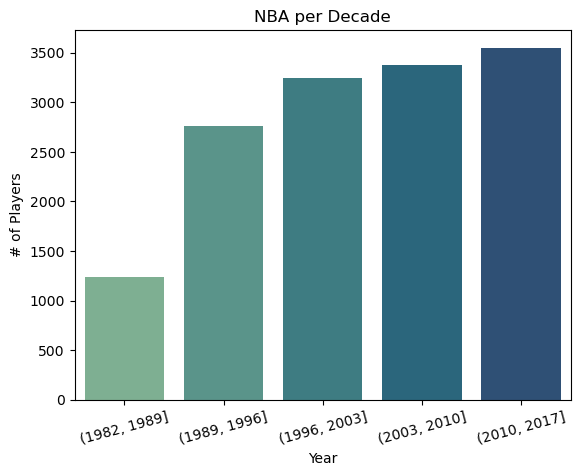

In [5]:
nba['birthYear'] = pd.to_datetime(nba['birthDate']).dt.year
nba['age'] = nba['season_start'] - nba['birthYear']

#Binning Values
bins=[1982, 1989, 1996, 2003, 2010, 2017]
nba_bin = pd.cut(nba['season_start'], bins=bins)
nba_count = nba_bin.value_counts().sort_index()
nba['year_interval'] = pd.cut(nba['season_start'], bins=bins, right=False)
nba['age_interval'] = pd.cut(nba['age'], bins=[18,22,26,30,34,38,44], right=False)

# create the barplot using seaborn
pal = sns.color_palette("crest", 5)
bar = sns.barplot(x=nba_count.index.astype(str), y=nba_count.values, palette=pal)
bar.set(title='NBA per Decade', xlabel='Year', ylabel="# of Players")
plt.xticks(rotation=15)

/Users/rohanbose30/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Players Age'),
 Text(0, 0.5, 'Number of Players'),
 Text(0.5, 1.0, 'Number of Players by Age')]

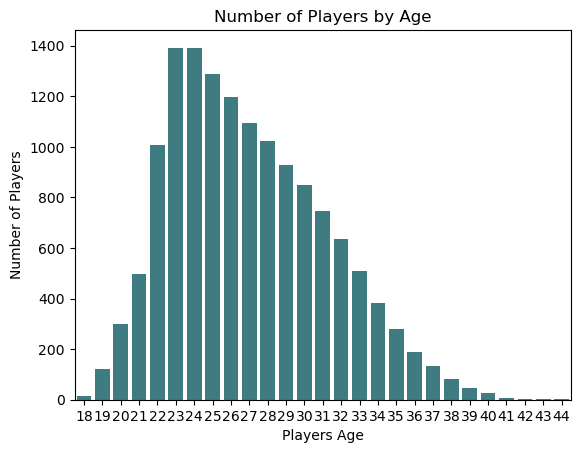

In [6]:
blue1 = sns.color_palette("crest", 1)
bp1 = sns.barplot(nba['age'].value_counts(sort=False).sort_index().index, nba['age'].value_counts(sort=False).sort_index(), data=nba, palette=blue1)
bp1.set(xlabel='Players Age',
       ylabel='Number of Players',
       title='Number of Players by Age')

[Text(0.5, 0, 'Players Age'),
 Text(0, 0.5, 'Number of Players'),
 Text(0.5, 1.0, 'Number of Players by Age')]

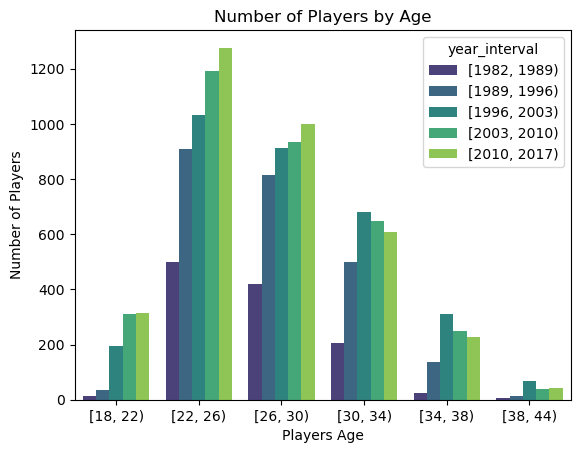

In [7]:
cp1 = sns.countplot(x='age_interval', hue='year_interval', data=nba, palette='viridis')
cp1.set(xlabel='Players Age',
ylabel='Number of Players',
title='Number of Players by Age')

/Users/rohanbose30/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Players Age'),
 Text(0, 0.5, 'Salary (Millions of $)'),
 Text(0.5, 1.0, 'Salary vs Age of NBA Players')]

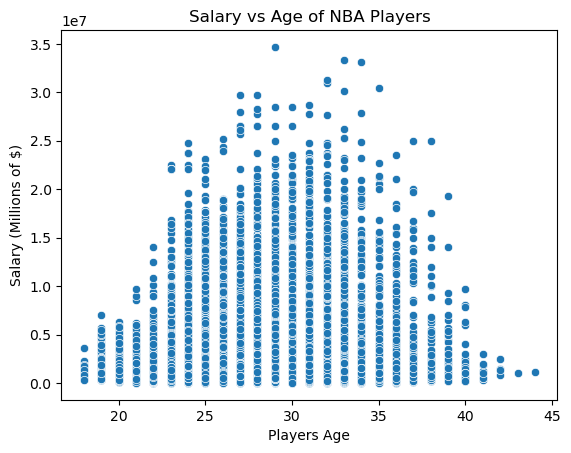

In [8]:
blue2 = sns.color_palette("tab10")
bp2 = sns.scatterplot(nba['age'], nba['salary'], data=nba, palette=blue2)
bp2.set(xlabel='Players Age',
       ylabel='Salary (Millions of $)',
       title='Salary vs Age of NBA Players')

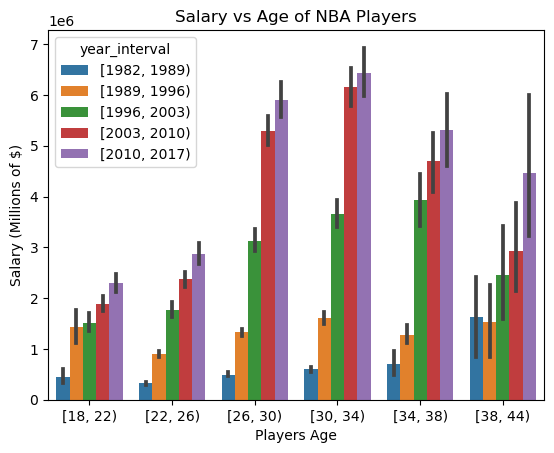

In [9]:
bp2 = sns.barplot(x='age_interval', y='salary', hue='year_interval', data=nba)
bp2.set(xlabel='Players Age',
       ylabel='Salary (Millions of $)',
       title='Salary vs Age of NBA Players')

# set the title and labels for the plot
bp2.set(xlabel='Players Age', ylabel='Salary (Millions of $)', title='Salary vs Age of NBA Players')

# show the plot
plt.show()

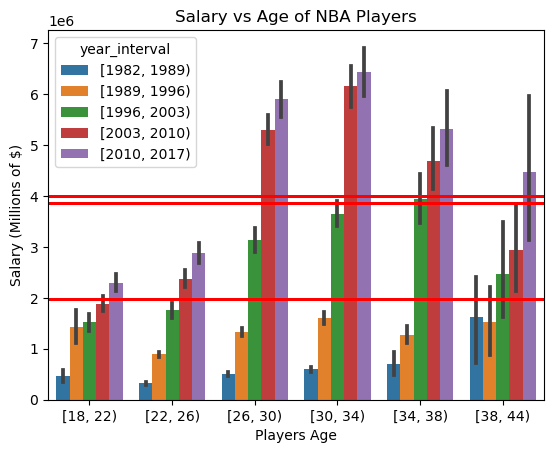

In [10]:
# calculate mean salary for each age interval
age_avg = nba.groupby('age_interval')['salary'].mean().to_dict()

# create barplot
bp2 = sns.barplot(x='age_interval', y='salary', hue='year_interval', data=nba)

# loop over each bar and add the average value as a horizontal line
for p in bp2.patches:
    age_interval = nba.loc[round(p.get_x()), 'age_interval']
    if age_interval in age_avg:
        avg = age_avg[age_interval]
        bp2.axhline(avg, color='red', linewidth=2)

# set the title and labels for the plot
bp2.set(xlabel='Players Age', ylabel='Salary (Millions of $)', title='Salary vs Age of NBA Players')

# show the plot
plt.show()


[Text(0.5, 0, 'Players Age'),
 Text(0, 0.5, 'Salary (Millions of $)'),
 Text(0.5, 1.0, 'Salary vs Age of NBA Players')]

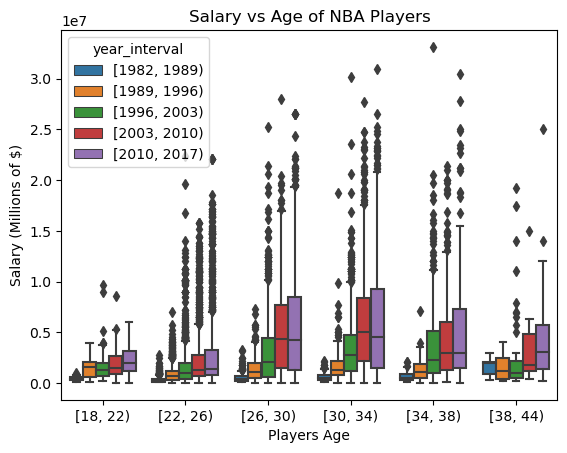

In [11]:
blue2 = sns.color_palette("tab10")
bp2 = sns.boxplot(x='age_interval', y='salary', hue='year_interval', data=nba)
bp2.set(xlabel='Players Age',
       ylabel='Salary (Millions of $)',
       title='Salary vs Age of NBA Players')

In [12]:
from sklearn.linear_model import LinearRegression

# extract age and salary data from the NBA dataset
age = nba['age'].values.reshape(-1, 1)
salary = nba['salary']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(age, salary, test_size=0.7, random_state=0)

# fit the linear regression model to the training data
reg = LinearRegression()
reg.fit(X_train, y_train)

# predict the salaries for the test data
y_pred = reg.predict(X_test)

# calculate the R-squared value to evaluate the model's performance
r_squared = reg.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print('R-squared value:', r_squared)
print('Mean Squared Error:', mse)

R-squared value: 0.05002096723812477
Mean Squared Error: 16443441812742.445


In [13]:
nbaData = nba[['career_AST', 'career_FG%', 'career_FG3%', 'career_G', 
               'career_PER', 'career_PTS', 'career_TRB', 'career_WS', 'career_eFG%', 
               'height', 'weight', 'age', 'salary']]

def height_to_inches(height):
    feet, inches = height.split("-")
    return int(feet) * 12 + int(inches)

nbaData['weight'] = nbaData['weight'].str.extract('(\d+)', expand=False)
nbaData["height"] = nbaData["height"].apply(height_to_inches)

nbaData.dropna(axis=0, inplace=True)
nbaData = nbaData.replace(r'^-$', '0', regex=True)
nbaData = nbaData.astype(float)

nbaTarget = nbaData.pop('salary')

nbaData.to_csv('nbaData.csv',index=False)

/var/folders/8c/zc5713gn65n2vd4c3bqd7ypc0000gn/T/ipykernel_23989/3405024136.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbaData['weight'] = nbaData['weight'].str.extract('(\d+)', expand=False)
/var/folders/8c/zc5713gn65n2vd4c3bqd7ypc0000gn/T/ipykernel_23989/3405024136.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nbaData["height"] = nbaData["height"].apply(height_to_inches)
/var/folders/8c/zc5713gn65n2vd4c3bqd7ypc0000gn/T/ipykernel_23989/3405024136.py:12: SettingWithCopyWarning: 
A value is t

In [14]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import StandardScaler

mps_device = torch.device('mps')
nbaNN = nba.copy()

# Check for missing values and drop them
if nbaNN.isna().sum().sum() > 0:
    nbaNN.dropna(inplace=True)

# Normalize input and output variables
scaler = StandardScaler()
nbaNN[['age', 'salary']] = scaler.fit_transform(nbaNN[['age', 'salary']])

# Split data into training and testing sets
train_data = nbaNN.sample(frac=0.8, random_state=42)
test_data = nbaNN.drop(train_data.index)

# Define neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(p=0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize neural network
net = Net()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)

# Train neural network
for epoch in range(2000):
    inputs = torch.tensor(train_data['age'].values.reshape(-1, 1), dtype=torch.float32)
    targets = torch.tensor(train_data['salary'].values.reshape(-1, 1), dtype=torch.float32)
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 2000, loss.item()))

# Evaluate neural network on test set
test_inputs = torch.tensor(test_data['age'].values.reshape(-1, 1), dtype=torch.float32)
test_targets = torch.tensor(test_data['salary'].values.reshape(-1, 1), dtype=torch.float32)
test_outputs = net(test_inputs)
test_loss = criterion(test_outputs, test_targets)
print('Test Loss: {:.4f}'.format(test_loss.item()))

# Print learned parameters and equation
for name, param in net.named_parameters():
    if name == 'fc1.weight':
        w = param.detach().numpy()[0][0]
    if name == 'fc1.bias':
        b = param.detach().numpy()[0]
print('Learned Parameters: w = {:.4f}, b = {:.4f}'.format(w, b))
print('Equation: salary = {:.4f} * age + {:.4f}'.format(w, b))

Epoch [1/2000], Loss: 1.0344
Epoch [101/2000], Loss: 0.9721
Epoch [201/2000], Loss: 0.9489
Epoch [301/2000], Loss: 0.9366
Epoch [401/2000], Loss: 0.9308
Epoch [501/2000], Loss: 0.9284
Epoch [601/2000], Loss: 0.9270
Epoch [701/2000], Loss: 0.9260
Epoch [801/2000], Loss: 0.9252
Epoch [901/2000], Loss: 0.9245
Epoch [1001/2000], Loss: 0.9240
Epoch [1101/2000], Loss: 0.9236
Epoch [1201/2000], Loss: 0.9232
Epoch [1301/2000], Loss: 0.9230
Epoch [1401/2000], Loss: 0.9228
Epoch [1501/2000], Loss: 0.9226
Epoch [1601/2000], Loss: 0.9225
Epoch [1701/2000], Loss: 0.9224
Epoch [1801/2000], Loss: 0.9223
Epoch [1901/2000], Loss: 0.9222
Test Loss: 0.9462
Learned Parameters: w = 0.7735, b = 0.0795
Equation: salary = 0.7735 * age + 0.0795


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

mps_device = torch.device('mps')

# split data into train and test sets
X = nbaData.values
y = nbaTarget.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define the neural network
class NBA_Net(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NBA_Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# initialize the neural network
input_size = X_train.shape[1]
hidden_size = 40
net = NBA_Net(input_size, hidden_size)

# define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001)

# train the neural network
num_epochs = 1000
for epoch in range(num_epochs):
    # convert inputs and targets to tensors
    inputs = torch.from_numpy(X_train.astype(np.float32))
    targets = torch.from_numpy(y_train.astype(np.float32))

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    # print loss
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# evaluate the neural network on test set
net.eval()
with torch.no_grad():
    test_inputs = torch.from_numpy(X_test.astype(np.float32))
    test_outputs = net(test_inputs)
    test_loss = criterion(test_outputs, torch.from_numpy(y_test.astype(np.float32)))
    print(f'Test Loss: {test_loss.item():.4f}')

# calculate feature importance
net.eval()
with torch.no_grad():
    inputs = torch.from_numpy(X_train.astype(np.float32))
    outputs = net(inputs)
    sse_baseline = ((targets - targets.mean())**2)


Epoch [100/1000], Loss: nan
Epoch [200/1000], Loss: nan
Epoch [300/1000], Loss: nan
Epoch [400/1000], Loss: nan
Epoch [500/1000], Loss: nan
Epoch [600/1000], Loss: nan
Epoch [700/1000], Loss: nan
Epoch [800/1000], Loss: nan
Epoch [900/1000], Loss: nan
Epoch [1000/1000], Loss: nan
Test Loss: nan
